# Procedure

estimate local Hurst => fit to polynomial function => input to mbm simulator => simulate prices based on H(t)

In [1]:
import pandas as pd
from hurst import compute_Hc
from fbm import MBM
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erfinv

In [2]:
df = pd.read_csv('../data/raw/MacroTrends_Data_Download_FL.csv')
your_time_series = df['close'].values

# Define window size and step
window_size = 100  # Adjust the window size as needed
step = 10  # Adjust the step size as needed

def rolling_hurst(your_time_series, window_size, step):
    # Perform rolling window analysis
    num_windows = (len(your_time_series) - window_size) // step + 1
    hurst_values = np.zeros(num_windows)

    for i in range(num_windows):
        start = i * step
        end = start + window_size
        window_data = your_time_series[start:end]

        # Compute Hurst exponent for the current window
        H, c, data = compute_Hc(window_data, kind='price', simplified=True)
        hurst_values[i] = H
    return hurst_values

rolling_hurst_ = rolling_hurst(your_time_series,window_size, step)


y = rolling_hurst_[-200:-100]
x = np.linspace(0,len(y),len(y)).round()
# Choose polynomial degree
degree = 70

# Fit polynomial using least squares method
coefficients = np.polyfit(x, y, degree)

# Create a polynomial function
poly_function = np.poly1d(coefficients)

# Evaluate the fitted polynomial over a range of x-values
x_values = np.linspace(min(x), max(x), 100)
y_fit = poly_function(x_values)

m = MBM(n=2**10, hurst=poly_function, length=1, method='riemannliouville')
mbm_sample = m.mbm()
t_values = m.times()

/var/folders/x8/wry4p1zj0pv6lw6tw9wysqh40000gn/T/ipykernel_53867/1448377931.py:32: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, degree)


Text(0.5, 1.0, 'mbm simulation')

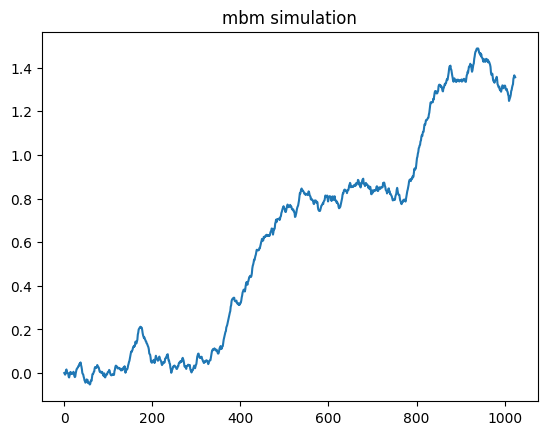

In [3]:
plt.plot(mbm_sample)
plt.title('mbm simulation')

Text(0.5, 1.0, 'rolling_hurst')

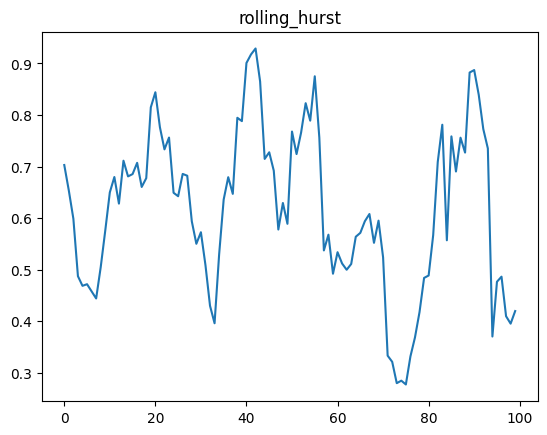

In [4]:
plt.plot(rolling_hurst_[-200:-100])
plt.title('rolling_hurst')

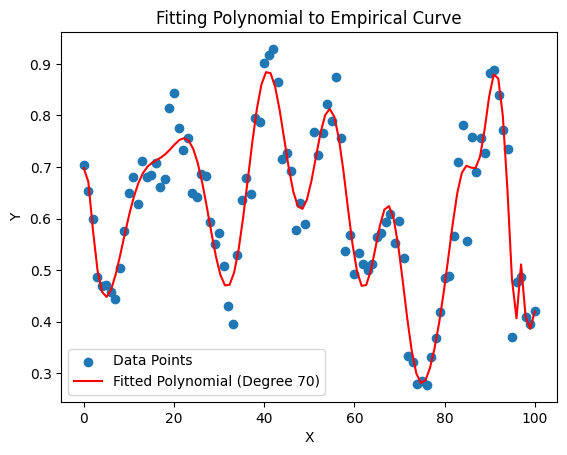

In [5]:
# Plot the original data and the fitted polynomial
plt.scatter(x, y, label='Data Points')
plt.plot(x_values, y_fit, label=f'Fitted Polynomial (Degree {degree})', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Polynomial to Empirical Curve')
plt.show()